In [124]:
import gensim
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, TimeDistributed
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.visualize_util import plot,model_to_dot
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
import pickle
import pandas as pd
import numpy as np

In [125]:
corpora = gensim.corpora.Dictionary.load('./data/corpora.dat')
vocab_size = len(corpora)
print('Number of words in corpora: %d'%(vocab_size))
tmp = list(corpora.items())

Number of words in corpora: 26


In [126]:
#the_filename = './data/wonderland.txt.dat'
the_filename = './data/test.txt.dat'
with open(the_filename, 'rb') as f:
    text = pickle.load(f)

In [127]:
len(text)

30

### Generate words patterns

In [128]:
seq_length = 4
n_hidden_1 = 100

In [129]:
dataX = []
dataY = []

for i in range(0, len(text)-seq_length-1, 1):
    seq_in = text[i:i+seq_length]
    dataX.append(seq_in)
    
for i in range(1, len(text)-seq_length, 1):
    seq_out = text[i:i+seq_length]
    dataY.append(seq_out)

In [130]:
seq_length

4

In [131]:
len(dataX)

25

In [132]:
len(dataY)

25

In [133]:
#dataX, dataY

In [134]:
emb = Embedding(input_dim=vocab_size, output_dim=4, input_length=seq_length)

In [135]:
lstm_1 = LSTM(n_hidden_1, return_sequences=True)
#lstm_1 = LSTM(n_hidden_1, input_length=seq_lenght)

In [136]:
#out_layer = Dense(output_dim=vocab_size, activation='softmax')
out_layer = TimeDistributed( Dense(output_dim=vocab_size, activation='softmax') )

In [137]:
model = Sequential(layers=[emb, lstm_1, out_layer])

In [138]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [139]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_5 (Embedding)          (None, 4, 4)          104         embedding_input_5[0][0]          
____________________________________________________________________________________________________
lstm_5 (LSTM)                    (None, 4, 100)        42000       embedding_5[0][0]                
____________________________________________________________________________________________________
timedistributed_5 (TimeDistribute(None, 4, 26)         2626        lstm_5[0][0]                     
Total params: 44730
____________________________________________________________________________________________________


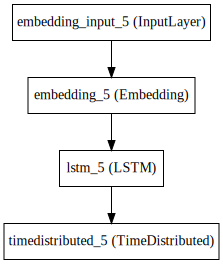

In [140]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [141]:
X = np.reshape(dataX, (len(dataX), seq_length))

In [142]:
X.shape

(25, 4)

In [143]:
y = np.reshape(dataY, (len(dataY), seq_length))
y.shape

(25, 4)

In [144]:
y = np.expand_dims(y,-1)
y.shape

(25, 4, 1)

In [145]:
filepath="test.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(X, y, batch_size=1, nb_epoch=100, callbacks=[checkpoint])

Epoch 1/100
25/25 [==============================] - 0s - loss: 3.2581 - acc: 0.0100     
Epoch 2/100
25/25 [==============================] - 0s - loss: 3.2465 - acc: 0.1400     
Epoch 3/100
25/25 [==============================] - 0s - loss: 3.2306 - acc: 0.1300     
Epoch 4/100
25/25 [==============================] - 0s - loss: 3.2012 - acc: 0.1300     
Epoch 5/100
25/25 [==============================] - 0s - loss: 3.1391 - acc: 0.1300     
Epoch 6/100
25/25 [==============================] - 0s - loss: 3.0236 - acc: 0.1300     
Epoch 7/100
25/25 [==============================] - 0s - loss: 2.8939 - acc: 0.1300     
Epoch 8/100
25/25 [==============================] - 0s - loss: 2.7802 - acc: 0.1400     
Epoch 9/100
25/25 [==============================] - 0s - loss: 2.6762 - acc: 0.1600     
Epoch 10/100
25/25 [==============================] - 0s - loss: 2.5842 - acc: 0.2100     
Epoch 11/100
25/25 [==============================] - 0s - loss: 2.4716 - acc: 0.2700     
Epoch 12

In [146]:
#print(history.history)

In [147]:
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

Model Accuracy: 98.00%


### Test prediction

In [148]:
def get_nexts(inp):
    idxs = [corpora.token2id[c] for c in inp]
    arr = np.array(idxs)[np.newaxis,:]
    p = model.predict(arr)[0]
    print(p)
    return [corpora.id2token[np.argmax(o)] for o in p]

In [151]:
get_nexts(['One', 'two', 'three', 'four'])

[[  8.02849710e-01   7.62595842e-03   4.64895238e-05   8.67575454e-06
    2.37738825e-02   5.68908326e-05   9.22052550e-06   8.78852617e-04
    3.78462311e-04   9.60024117e-05   1.01869823e-02   2.11351714e-03
    1.07550165e-02   1.69936903e-02   8.30134377e-03   7.68588707e-02
    2.20395406e-04   2.75677741e-02   6.89263979e-05   1.81836785e-05
    5.14620123e-03   2.22313669e-04   4.25144099e-03   1.07854756e-03
    3.98930017e-04   9.37501754e-05]
 [  4.10890003e-04   4.01653146e-08   2.02512590e-10   2.60471495e-07
    9.88174319e-01   6.32909836e-11   5.17353764e-11   1.77943016e-09
    5.44086285e-03   7.73098807e-11   7.06095670e-05   3.59245722e-09
    8.79782136e-04   4.60821002e-06   6.93415586e-06   3.48302342e-06
    1.72929547e-04   4.53139376e-03   1.77011508e-08   1.85015665e-08
    1.78856062e-04   8.89805960e-07   1.19456476e-04   4.20646380e-08
    6.14114493e-09   4.59468083e-06]
 [  9.13981391e-11   2.84502283e-12   2.14081140e-13   1.68607652e-03
    6.62002771e-

['two', 'three', 'four', 'five']

In [ ]:
test_cases_text = pd.read_csv('./data/test_cases_text.csv')
pred = []
for index, row in test_cases_text.iterrows():
    #print( '%s %s'%(row['in_0'], row['in_1']))
    inp = [row['in_0'], row['in_1']]
    #print(inp)
    tmp = get_next_emb(inp)
    pred.append(tmp)
test_cases_text['predicted'] = pred

In [ ]:
test_cases_text[test_cases_text.out!=test_cases_text.predicted]

In [ ]:
true_cnt = len(test_cases_text[test_cases_text.out==test_cases_text.predicted].index) * 1.0
all_cnt = len(test_cases_text.index) * 1.0
print('True cnt: %d All cnt %d'%(true_cnt, all_cnt))
print("Precision: %.2f"%( true_cnt/all_cnt))